# Data Visualization

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
census_pop_csv = pd.read_csv("Data/CensusTotalPopulation_perH.csv")
county_csv = pd.read_csv("Data/countydata.csv")
white_csv = pd.read_csv("Data/whitedata.csv")
black_csv = pd.read_csv("Data/blackdata.csv")
hispanic_csv = pd.read_csv("Data/hispanicdata.csv")
asian_csv = pd.read_csv("Data/asiandata.csv")
indian_csv = pd.read_csv("Data/indiandata.csv")
states = pd.read_csv("Data/state_abbreviations.csv")

# fasttop_csv = pd.read_csv("Top10.csv")
# fastbottom_csv = pd.read_csv("bottom10.csv")
# hospital_csv = pd.read_csv("hospitals.csv")

In [3]:
census = census_pop_csv[["CountyName", "State", "white_perh", "black_perh", "amerind_perh", 
                         "asian_perh", "nathaw_perh", "multi_perh", "hisp_perh"]]
census = census.rename(columns = {"CountyName" : "County"})
white = white_csv[["County", "State", "Value", "Race/Ethnicity", "Lat", "Lng"]]
white = white.rename(columns = {"Value" : "white_val"})

black = black_csv[["County", "State", "Value", "Race/Ethnicity"]]
black = black.rename(columns = {"Value" : "black_val"})

asian = asian_csv[["County", "State", "Value", "Race/Ethnicity"]]
asian = asian.rename(columns = {"Value" : "asian_val"})

hispanic = hispanic_csv[["County", "State", "Value", "Race/Ethnicity"]]
hispanic = hispanic.rename(columns = {"Value" : "hisp_val"})

indian = indian_csv[["County", "State", "Value", "Race/Ethnicity"]]
indian = indian.rename(columns = {"Value" : "amerind_val"})

In [4]:
composite = pd.merge(census, white, how = "inner", on = ["County", "State"])

In [5]:
composite = pd.merge(composite, black, how = "inner", on = ["County", "State"])

In [6]:
composite = pd.merge(composite, asian, how = "inner", on = ["County", "State"])

In [7]:
composite = pd.merge(composite, hispanic, how = "inner", on = ["County", "State"])

In [8]:
composite = pd.merge(composite, indian, how = "inner", on = ["County", "State"])

In [9]:
avg_ethnic = composite[["white_perh", "black_perh", "amerind_perh", "asian_perh", "hisp_perh", 
                        "white_val", "black_val", "asian_val", "hisp_val", "amerind_val"]].mean()

In [10]:
composite

,County,State,white_perh,black_perh,amerind_perh,asian_perh,nathaw_perh,multi_perh,hisp_perh,white_val,...,Lat,Lng,black_val,Race/Ethnicity_y,asian_val,Race/Ethnicity_x,hisp_val,Race/Ethnicity_y,amerind_val,Race/Ethnicity
0,Los Angeles County,CA,53431.166380,8344.055159,545.497219,13979.553053,261.414371,3888.481115,48129.068558,350.9,...,34.322796,-118.221787,474.2,Black,190.5,Asian and Pacific Islander,232.1,Hispanic,311.2,American Indian and Alaskan Native
1,Madera County,CA,82537.454412,3530.291502,1500.144308,2187.573794,166.609818,3351.874688,55105.213444,362.7,...,37.212682,-119.747330,486.2,Black,227.3,Asian and Pacific Islander,241.8,Hispanic,301.4,American Indian and Alaskan Native
2,Mariposa County,CA,88320.517107,863.702218,3332.218879,1292.767190,412.348156,3555.109774,9634.458932,350.5,...,37.575843,-119.896002,456.2,Black,216.8,Asian and Pacific Islander,239.8,Hispanic,250.5,American Indian and Alaskan Native
3,Mendocino County,CA,82341.460074,804.684290,4758.480573,1791.991965,212.299685,3772.314295,23206.866639,333.9,...,39.436309,-123.377828,356.3,Black,178.7,Asian and Pacific Islander,195.3,Hispanic,299.2,American Indian and Alaskan Native
4,Merced County,CA,64521.480530,3484.207348,773.673689,7584.601447,218.646912,3942.142663,56293.934842,400.5,...,37.186923,-120.704731,479.3,Black,178.8,Asian and Pacific Islander,227.2,Hispanic,291.4,American Indian and Alaskan Native
5,Modoc County,CA,89941.081950,1156.936261,2528.119979,557.043385,0.000000,4413.497590,14408.141403,374.9,...,41.583941,-120.718904,439.4,Black,211.4,Asian and Pacific Islander,205.5,Hispanic,393.8,American Indian and Alaskan Native
6,Mono County,CA,84499.401113,443.880786,2677.376171,817.304305,930.035933,1683.928697,27076.727964,283.2,...,37.933321,-118.882552,422.7,Black,235.9,Asian and Pacific Islander,238.7,Hispanic,267.5,American Indian and Alaskan Native
7,Monterey County,CA,75269.163880,2783.066268,979.227020,6235.659301,513.735300,3671.924825,56456.991436,251.1,...,36.216903,-121.227026,282.5,Black,196.1,Asian and Pacific Islander,185.6,Hispanic,294.3,American Indian and Alaskan Native
8,Napa County,CA,77228.497770,2148.607211,499.809699,7441.132327,255.649789,3554.681048,32988.158244,300.8,...,38.508289,-122.327344,319.5,Black,176.4,Asian and Pacific Islander,158.4,Hispanic,249.4,American Indian and Alaskan Native
9,Nevada County,CA,92626.209358,363.061071,991.826055,1496.866316,167.332617,2699.632882,8874.713506,234.5,...,39.295924,-120.761996,407.7,Black,185.3,Asian and Pacific Islander,207.2,Hispanic,362.8,American Indian and Alaskan Native


# Lets Start plotting some sh*t

Heat of fast food

Heat of hospitals

pie chart of mortality by ethnicity

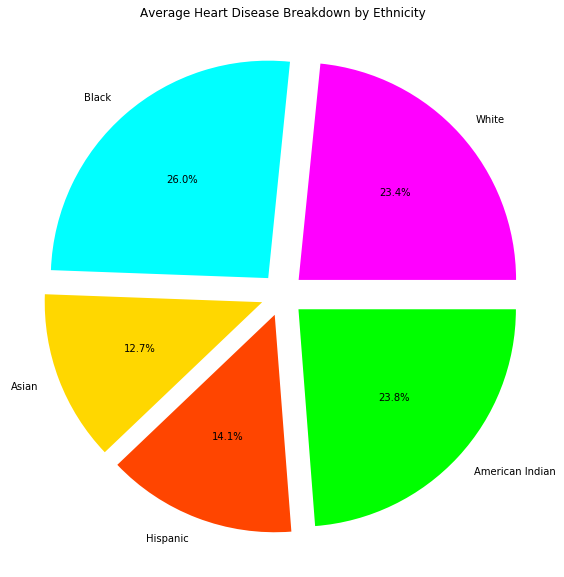

In [13]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1 = plt.pie(avg_ethnic[5:11], 
        labels = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        explode = (.1,.1,.1,.1,.1), 
        colors = col, autopct='%.1f%%')
fig1, plt.title("Average Heart Disease Breakdown by Ethnicity")
plt.show(fig1)


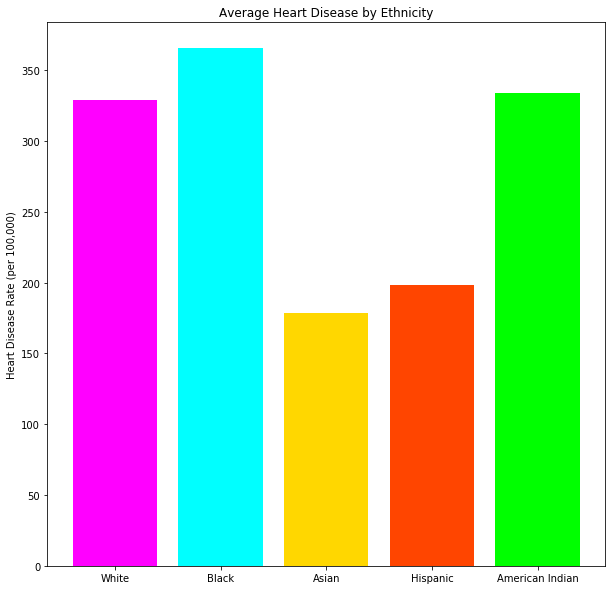

In [14]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig2, ax1 = plt.subplots(figsize=(10, 10))
fig2 = plt.bar(height = avg_ethnic[5:11], 
        x = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        color = col)
fig2, plt.title("Average Heart Disease by Ethnicity")
fig2, plt.ylabel("Heart Disease Rate (per 100,000)")
plt.show(fig2)

pie chart of ethnic breakdown

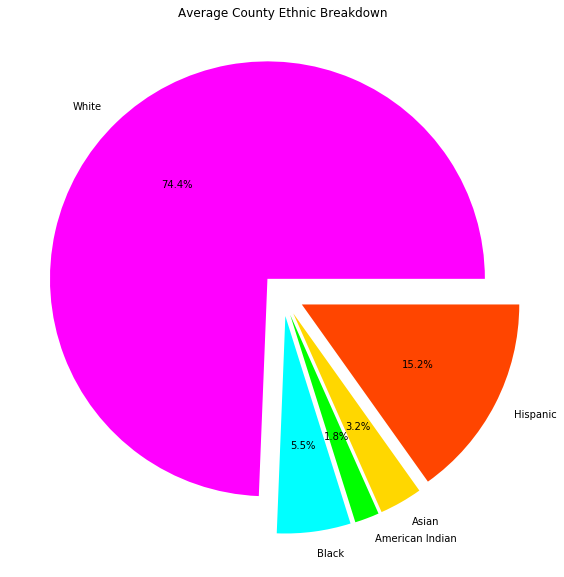

In [15]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig3, ax1 = plt.subplots(figsize=(10, 10))
fig3 = plt.pie(avg_ethnic[0:5], 
        labels = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        explode = (.1,.1,.1,.1,.1), 
        colors = col, autopct='%.1f%%')
fig3, plt.title("Average County Ethnic Breakdown")
plt.show(fig3)


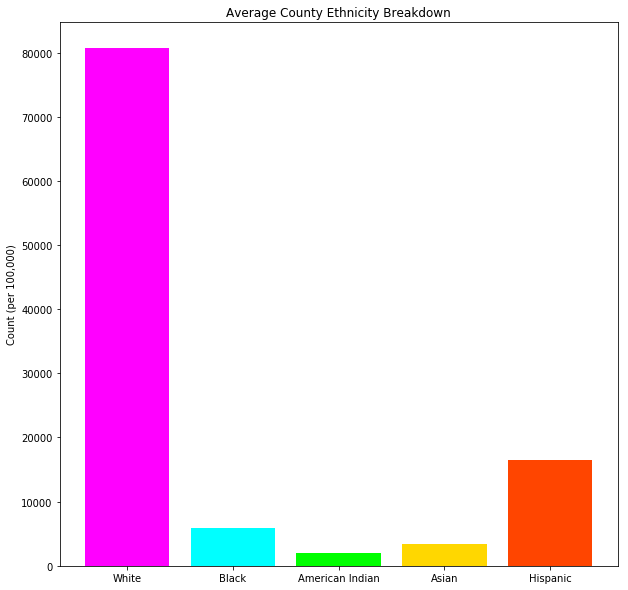

In [16]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig4, ax1 = plt.subplots(figsize=(10, 10))
fig4 = plt.bar(height = avg_ethnic[0:5], 
        x = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        color = col)
fig4, plt.title("Average County Ethnicity Breakdown")
fig4, plt.ylabel("Count (per 100,000)")
plt.show(fig4)

y=-24.608295x+(88794.134967)


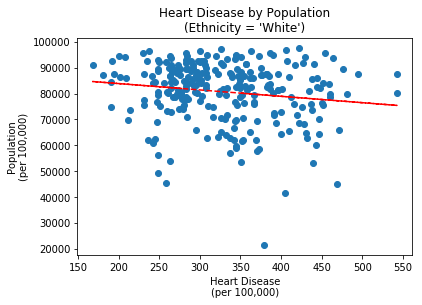

In [17]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# White Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.white_val
y = composite.white_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'White')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=16.906623x+(-238.446813)


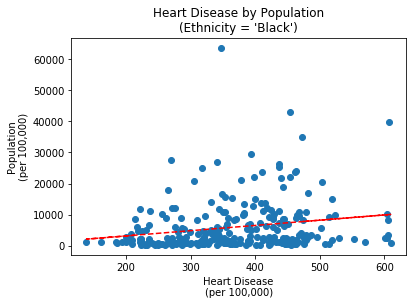

In [18]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Black Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.black_val
y = composite.black_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Black')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=3.161019x+(909.464381)


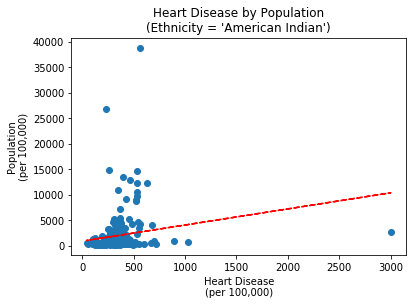

In [19]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# American Indian Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.amerind_val
y = composite.amerind_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'American Indian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()


In [20]:
# There's some potential outliers in american indian values
AI = pd.DataFrame(composite[["amerind_val", "amerind_perh"]])
AI = AI.sort_values(by = ["amerind_val"], ascending = False)
# Remove the first outlier
AI = AI[1:]

AI = AI.sort_values(by = ["amerind_perh"], ascending = False)
# Remove the second 2 outliers
AI =AI[2:]

y=6.313863x+(-319.193250)


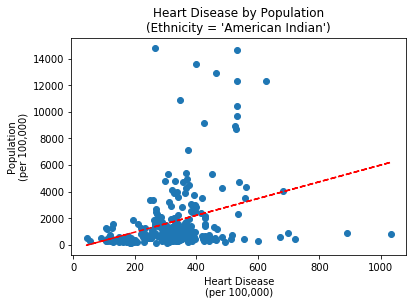

In [21]:
x = AI["amerind_val"]
y = AI["amerind_perh"]
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'American Indian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=-8.155429x+(4914.854652)


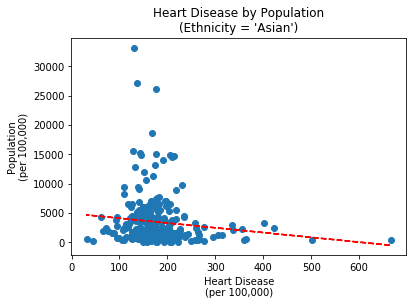

In [22]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Asian Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.asian_val
y = composite.asian_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Asian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

In [23]:
# Again, some potential outliers. Must remove.
AS = pd.DataFrame(composite[["asian_val", "asian_perh"]])
AS = AS.sort_values(by = ["asian_val"], ascending = False)
# Remove the first outlier
AS = AS[1:]

AS = AS.sort_values(by = ["asian_perh"], ascending = False)
# Remove the second 2 outliers
AI =AI[3:]

y=-8.643521x+(4997.726922)


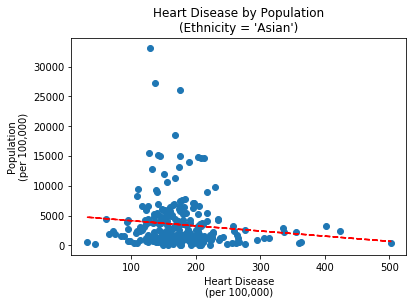

In [24]:
x = AS["asian_val"]
y = AS["asian_perh"]
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Asian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=35.402260x+(9428.809007)


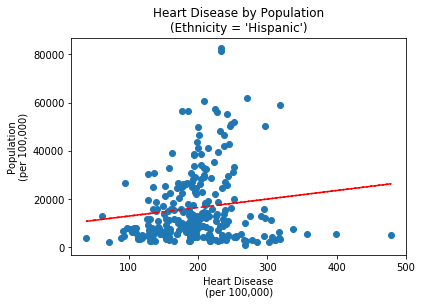

In [25]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Hispanic Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.hisp_val
y = composite.hisp_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Hispanic')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

# Quick chi-square tests

In [12]:
# we have all the average values for population by ethnicity and heart disease by ethnicity. 
# If we convert them into proportions, then we can directly compare the two sets of proportions
# to see if they are similar or not. 
census_pop_csv.columns
census2 = census_pop_csv[["State", "CountyName", "whiteperc", "blackperc", "amerindperc",
                          "asianperc", "nathawperc", "multiperc", "hispperc"]]
census2 = census2.rename(columns = {"CountyName" : "County"})


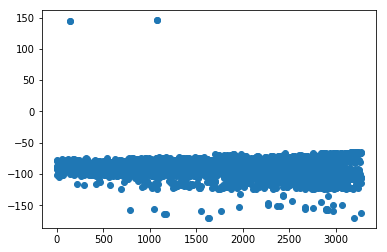

In [50]:
plt.scatter(x=county_csv.index, y=county_csv.Lng)

In [36]:
comp2 = pd.merge(census2, white, how = "inner", on = ["County", "State"])
comp2 = pd.merge(comp2, black, how = "inner", on = ["County", "State"])
comp2 = pd.merge(comp2, asian, how = "inner", on = ["County", "State"])
comp2 = pd.merge(comp2, hispanic, how = "inner", on = ["County", "State"])
comp2 = pd.merge(comp2, indian, how = "inner", on = ["County", "State"])


In [53]:
comp2["countytotal"] = comp2[["white_val", "black_val", "asian_val", "hisp_val", "amerind_val"]].sum(axis =1)

comp2["white_val_perc"] = (comp2.white_val/comp2.countytotal)*100
comp2["black_val_perc"] = (comp2.black_val/comp2.countytotal)*100
comp2["asian_val_perc"] = (comp2.asian_val/comp2.countytotal)*100
comp2["hisp_val_perc"] = (comp2.hisp_val/comp2.countytotal)*100
comp2["amerind_val_perc"] = (comp2.amerind_val/comp2.countytotal)*100

,State,County,whiteperc,blackperc,amerindperc,asianperc,nathawperc,multiperc,hispperc,white_val,...,hisp_val,Race/Ethnicity_y,amerind_val,Race/Ethnicity,countytotal,white_val_perc,black_val_perc,asian_val_perc,hisp_val_perc,amerind_val_perc
0,CA,Los Angeles County,53.431166,8.344055,0.545497,13.979553,0.261414,3.888481,48.129069,350.9,...,232.1,Hispanic,311.2,American Indian and Alaskan Native,1558.9,22.509462,30.418885,12.220155,14.888704,19.962794
1,CA,Madera County,82.537454,3.530292,1.500144,2.187574,0.166610,3.351875,55.105213,362.7,...,241.8,Hispanic,301.4,American Indian and Alaskan Native,1619.4,22.397184,30.023465,14.036063,14.931456,18.611832
2,CA,Mariposa County,88.320517,0.863702,3.332219,1.292767,0.412348,3.555110,9.634459,350.5,...,239.8,Hispanic,250.5,American Indian and Alaskan Native,1513.8,23.153653,30.136081,14.321575,15.840930,16.547761
3,CA,Mendocino County,82.341460,0.804684,4.758481,1.791992,0.212300,3.772314,23.206867,333.9,...,195.3,Hispanic,299.2,American Indian and Alaskan Native,1363.4,24.490245,26.133196,13.106939,14.324483,21.945137
4,CA,Merced County,64.521481,3.484207,0.773674,7.584601,0.218647,3.942143,56.293935,400.5,...,227.2,Hispanic,291.4,American Indian and Alaskan Native,1577.2,25.393102,30.389297,11.336546,14.405275,18.475780


In [54]:
avg_perc = comp2[["whiteperc", "blackperc", "amerindperc", "asianperc", "hispperc", 
                  "white_val_perc", "black_val_perc", "asian_val_perc", "hisp_val_perc", "amerind_val_perc"]].mean()
avg_perc

whiteperc           80.699833
blackperc            5.943265
amerindperc          1.965943
asianperc            3.458734
hispperc            16.446368
white_val_perc      23.679841
black_val_perc      26.160387
asian_val_perc      12.810296
hisp_val_perc       14.251586
amerind_val_perc    23.097890
dtype: float64

In [55]:
stats.chisquare(avg_perc[0:5], avg_perc[5:11])

Power_divergenceResult(statistic=172.19474249145975, pvalue=3.53501946105778e-36)

In [35]:
comp2.iloc[1]

State                                               CA
County                                   Madera County
whiteperc                                      82.5375
blackperc                                      3.53029
amerindperc                                    1.50014
asianperc                                      2.18757
nathawperc                                     0.16661
multiperc                                      3.35187
hispperc                                       55.1052
white_val                                        362.7
Race/Ethnicity_x                                 White
Lat_x                                          37.2127
Lng_x                                         -119.747
black_val                                        486.2
Race/Ethnicity_y                                 Black
asian_val                                        227.3
Race/Ethnicity_x            Asian and Pacific Islander
hisp_val                                         241.8
Race/Ethni

In [41]:
comp2.head()

,State,County,whiteperc,blackperc,amerindperc,asianperc,nathawperc,multiperc,hispperc,white_val,...,Race/Ethnicity_x,hisp_val,Race/Ethnicity_y,amerind_val,Race/Ethnicity,white_val_perc,black_val_perc,asian_val_perc,hisp_val_perc,amerind_val_perc
0,CA,Los Angeles County,53.431166,8.344055,0.545497,13.979553,0.261414,3.888481,48.129069,350.9,...,Asian and Pacific Islander,232.1,Hispanic,311.2,American Indian and Alaskan Native,0.003509,0.004742,0.001905,0.002321,0.003112
1,CA,Madera County,82.537454,3.530292,1.500144,2.187574,0.166610,3.351875,55.105213,362.7,...,Asian and Pacific Islander,241.8,Hispanic,301.4,American Indian and Alaskan Native,0.003627,0.004862,0.002273,0.002418,0.003014
2,CA,Mariposa County,88.320517,0.863702,3.332219,1.292767,0.412348,3.555110,9.634459,350.5,...,Asian and Pacific Islander,239.8,Hispanic,250.5,American Indian and Alaskan Native,0.003505,0.004562,0.002168,0.002398,0.002505
3,CA,Mendocino County,82.341460,0.804684,4.758481,1.791992,0.212300,3.772314,23.206867,333.9,...,Asian and Pacific Islander,195.3,Hispanic,299.2,American Indian and Alaskan Native,0.003339,0.003563,0.001787,0.001953,0.002992
4,CA,Merced County,64.521481,3.484207,0.773674,7.584601,0.218647,3.942143,56.293935,400.5,...,Asian and Pacific Islander,227.2,Hispanic,291.4,American Indian and Alaskan Native,0.004005,0.004793,0.001788,0.002272,0.002914


mortality rate by number of hospitals

motrality rate by fast food

In [34]:
county_csv.loc[county_csv["State"] =="CA"]


,Unnamed: 0,State,County,Value,Gender,Race/Ethnicity,Lat,Lng
913,3479,CA,Yuba County,398.4,Overall,Overall,39.268646,-121.340045
941,3436,CA,Kern County,395.7,Overall,Overall,35.345591,-118.733080
1028,3438,CA,Lake County,388.0,Overall,Overall,39.097370,-122.744185
1062,3471,CA,Stanislaus County,385.3,Overall,Overall,37.553933,-120.989631
1074,3429,CA,Del Norte County,384.0,Overall,Overall,41.738952,-123.889508
1248,3466,CA,Shasta County,372.3,Overall,Overall,40.758306,-122.036920
1273,3439,CA,Lassen County,370.6,Overall,Overall,40.669961,-120.589843
1289,3475,CA,Tulare County,369.0,Overall,Overall,36.220455,-118.792225
1425,3446,CA,Modoc County,359.4,Overall,Overall,41.583941,-120.718904
1427,3457,CA,San Bernardino County,359.2,Overall,Overall,34.844701,-116.176459
